In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-02 21:29:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.48MB/s    in 44s     

2020-11-02 21:30:06 (7.04 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [40]:
# mengimport dan mengekstraksi
import os
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [41]:
# melakukan pemeriksaan direktori file
os.listdir('/tmp/rockpaperscissors/')

['rps-cv-images', 'rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [42]:
# mengubah direktori ke path dibawah
os.chdir('/tmp/rockpaperscissors/rps-cv-images')
os.listdir()

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [44]:
# menghapus file yang tidak dibutuhkan
os.remove('README_rpc-cv-images.txt')
os.listdir()

['rock', 'paper', 'scissors']

In [51]:
train_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images')
train_dir

'/tmp/rockpaperscissors/rps-cv-images'

In [1]:
import tensorflow as tf
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# melakukan augmentasi pada data
train_dir = "d://ddicoding"
train_datagen = ImageDataGenerator(
                  validation_split=0.4,
                  rescale=1./255,
                  rotation_range=20,
                  shear_range=0.2,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip = True,
                  vertical_flip = True,
                  fill_mode = 'wrap')

In [3]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [5]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    verbose=2)

Train for 42 steps, validate for 28 steps
Epoch 1/20
42/42 - 95s - loss: 1.1634 - accuracy: 0.3486 - val_loss: 1.0742 - val_accuracy: 0.4222
Epoch 2/20
42/42 - 98s - loss: 0.9896 - accuracy: 0.5236 - val_loss: 0.9144 - val_accuracy: 0.5458
Epoch 3/20
42/42 - 78s - loss: 0.7823 - accuracy: 0.6887 - val_loss: 0.6607 - val_accuracy: 0.7780
Epoch 4/20
42/42 - 63s - loss: 0.5754 - accuracy: 0.7831 - val_loss: 0.5554 - val_accuracy: 0.7941
Epoch 5/20
42/42 - 67s - loss: 0.4611 - accuracy: 0.8196 - val_loss: 0.5684 - val_accuracy: 0.7906
Epoch 6/20
42/42 - 67s - loss: 0.4326 - accuracy: 0.8463 - val_loss: 0.3625 - val_accuracy: 0.8730
Epoch 7/20
42/42 - 64s - loss: 0.3682 - accuracy: 0.8600 - val_loss: 0.3706 - val_accuracy: 0.8776
Epoch 8/20
42/42 - 57s - loss: 0.3296 - accuracy: 0.8775 - val_loss: 0.3661 - val_accuracy: 0.8604
Epoch 9/20
42/42 - 57s - loss: 0.2686 - accuracy: 0.9064 - val_loss: 0.3937 - val_accuracy: 0.8478
Epoch 10/20
42/42 - 57s - loss: 0.2170 - accuracy: 0.9285 - val_los

[[0. 1. 0.]]
Gambar yang terdeteksi: Rock


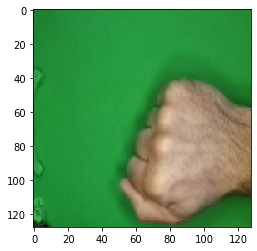

In [12]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

path="d:\\ddicoding\\rock\\batu (1).png"

img = image.load_img(path, target_size=(128,128))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(classes)

print('Gambar yang terdeteksi: ', end='')
if classes[0,0] == 1:
    print('Paper')
elif classes[0,1] == 1:
    print('Rock')
else:
    print('Scissors')

Saving btu.jpg to btu (1).jpg
[[1. 0. 0.]]
Gambar yang terdeteksi: Paper


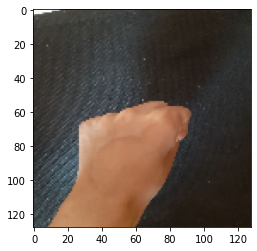

In [83]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(128,128))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(classes)

  print('Gambar yang terdeteksi: ', end='')
  if classes[0,0] == 1:
    print('Paper')
  elif classes[0,1] == 1:
    print('Rock')
  else:
    print('Scissors')